In [1]:
#Load the file 
#Introspection: 
#1. identify the structure 2. missing values 3. data types
#Cleaning: 1. Remove duplicates 2. Replace errorneous values 3. handle missing data
#visualising -exploratory data analysis  histograms, correlation heat map
#most influence fertiliser recommendations
#crop type with the highest average soil moisture
#irrigation adjustments for crops experiencing average temperatures
#export to cleaned_precision_agriculture_data.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

#load the file
df=pd.read_csv('climate_action_data.csv')

In [3]:
#the initial introspection
df.head(20)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [5]:
#descriptive data
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [6]:
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [7]:
#rows and columns
print(f'rows and coulmns \n{df.shape}')

rows and coulmns 
(913, 10)


In [8]:
columns1=list(df.columns)
print(columns1)

['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)', 'Drone_Image_ID']


In [9]:
#check for null values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [10]:
#handling null values
#hnadling null values in crop type
df['Crop_Type']=df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])

In [11]:
#check again for null values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [12]:
#change date column
df['Date']=pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      913 non-null    object        
 1   Date                           909 non-null    datetime64[ns]
 2   Soil_Moisture(%)               913 non-null    object        
 3   Soil_pH                        913 non-null    object        
 4   Temperature(C)                 913 non-null    object        
 5   Humidity(%)                    913 non-null    object        
 6   Crop_Type                      913 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object        
 8   Irrigation_Recommended(mm)     913 non-null    object        
 9   Drone_Image_ID                 913 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 71.5+ KB
None


In [13]:
#change to numeric values
# Handle missing values
numeric_columns =['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Irrigation_Recommended(mm)','Fertilizer_Recommended(kg/ha)']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') 
        df[col] = df[col].fillna(df[col].median())
        
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [14]:
print(df.to_string())

    Sensor_ID       Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm) Drone_Image_ID
0    SEN-1000 2025-01-01            36.220    6.980            21.3         50.4  Tomatoes                           67.6                        26.6       IMG-2000
1    SEN-1001 2025-01-02            76.550    5.030            23.5         34.3     Wheat                          130.4                         8.3       IMG-2001
2    SEN-1002 2025-01-03            61.240    6.520            21.9         54.6  Tomatoes                           36.0                        29.4       IMG-2002
3    SEN-1003 2025-01-04            51.910    6.620            24.0         48.7     Maize                           85.8                        19.6       IMG-2003
4    SEN-1004 2025-01-05            20.920    5.980            19.2         70.6     Wheat                           75.6                        29.9       IMG-2004
5    SEN-1

In [15]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [16]:
#null dates 
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [17]:
#bfill replace missing value with the next non-null value below it in the column.
df['Date'].fillna(method='bfill', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14092\1268952946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='bfill', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14092\1268952946.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='bfill', inplace=True)


In [18]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
908     True
909     True
910     True
911     True
912     True
Length: 913, dtype: bool

In [20]:
df=df.drop_duplicates()
print(f'Number of rows after dropping rows: {df.shape[0]}')

Number of rows after dropping rows: 802


In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
797    False
798    False
799    False
801    False
863    False
Length: 802, dtype: bool

In [22]:
#final clean dataset
# print(df.info())
# print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
0


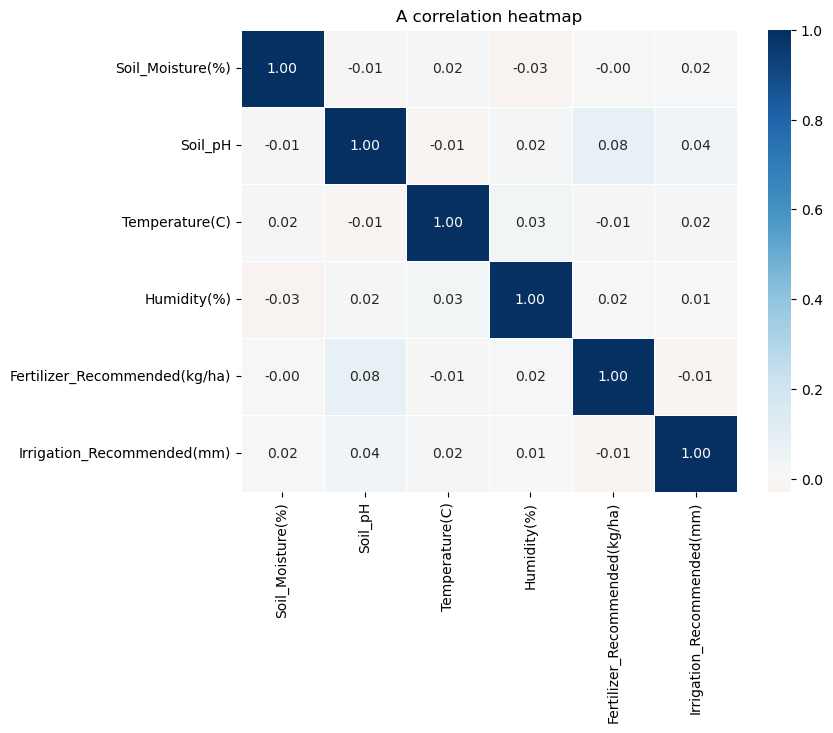

In [23]:
#correlation
corr_matrix=df[['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,cmap='RdBu',annot=True, fmt='.2f', linewidths=0.5, center=0)
plt.title("A correlation heatmap")
plt.show()

In [24]:
df.groupby('Crop_Type')['Fertilizer_Recommended(kg/ha)'].mean().sort_values(ascending=False)


Crop_Type
Tomatoes    88.898214
Maize       88.485806
Lettuce     87.997351
Wheat       87.796023
Beans       83.905263
Name: Fertilizer_Recommended(kg/ha), dtype: float64

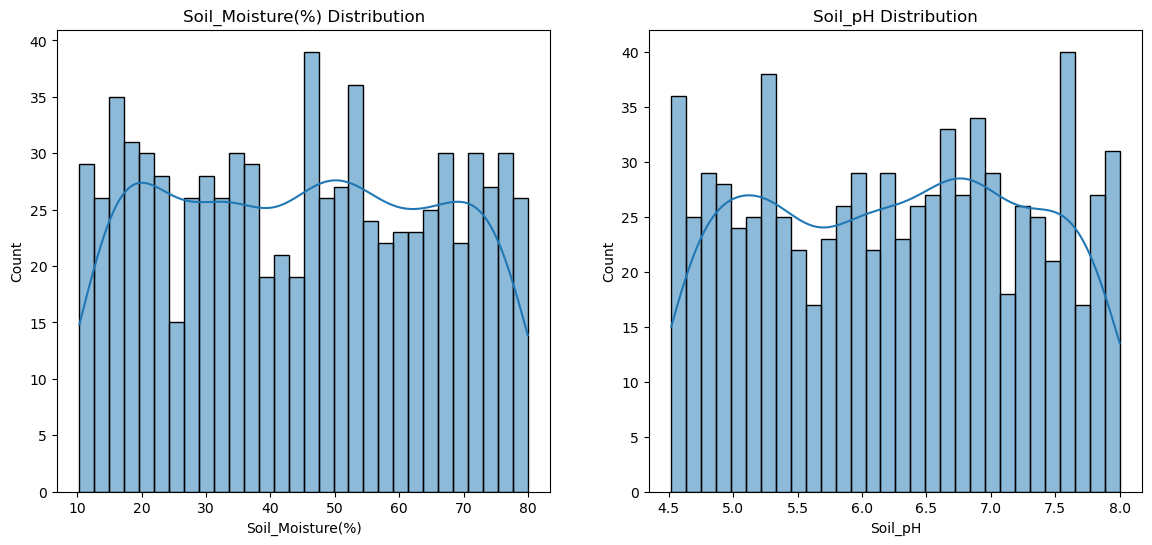

In [25]:
#histograms for the numeric values 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Soil_Moisture(%) Distribution")
sns.histplot(df['Soil_Moisture(%)'],bins=30,kde=True)

plt.subplot(1,2,2)
plt.title("Soil_pH Distribution")
sns.histplot(df['Soil_pH'],bins=30,kde=True)
plt.show()




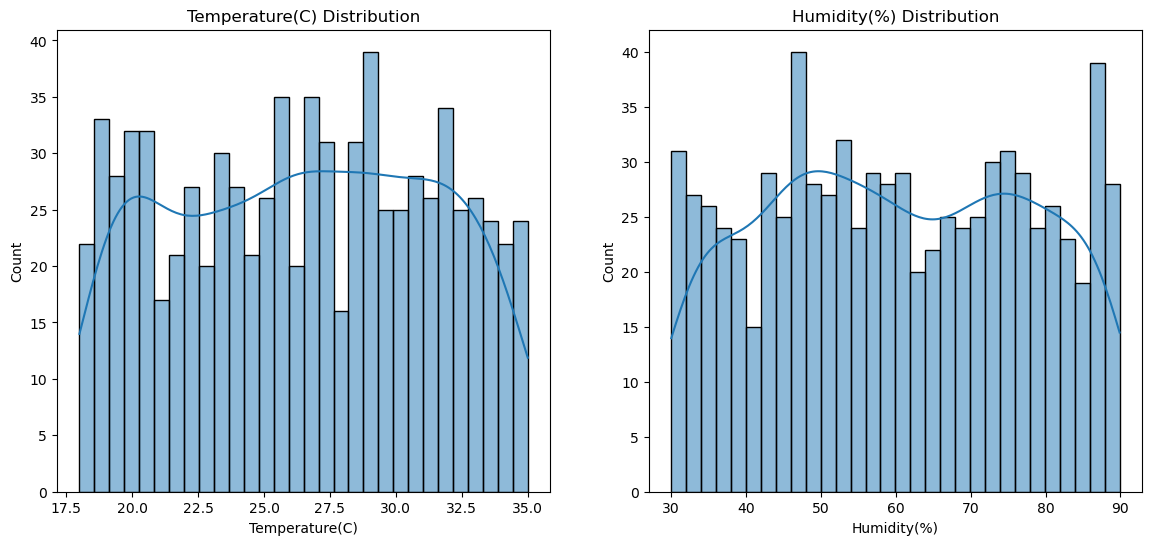

In [26]:
#histograms for the numeric values 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Temperature(C) Distribution")
sns.histplot(df['Temperature(C)'],bins=30,kde=True)

plt.subplot(1,2,2)
plt.title("Humidity(%) Distribution")
sns.histplot(df['Humidity(%)'],bins=30,kde=True)
plt.show()

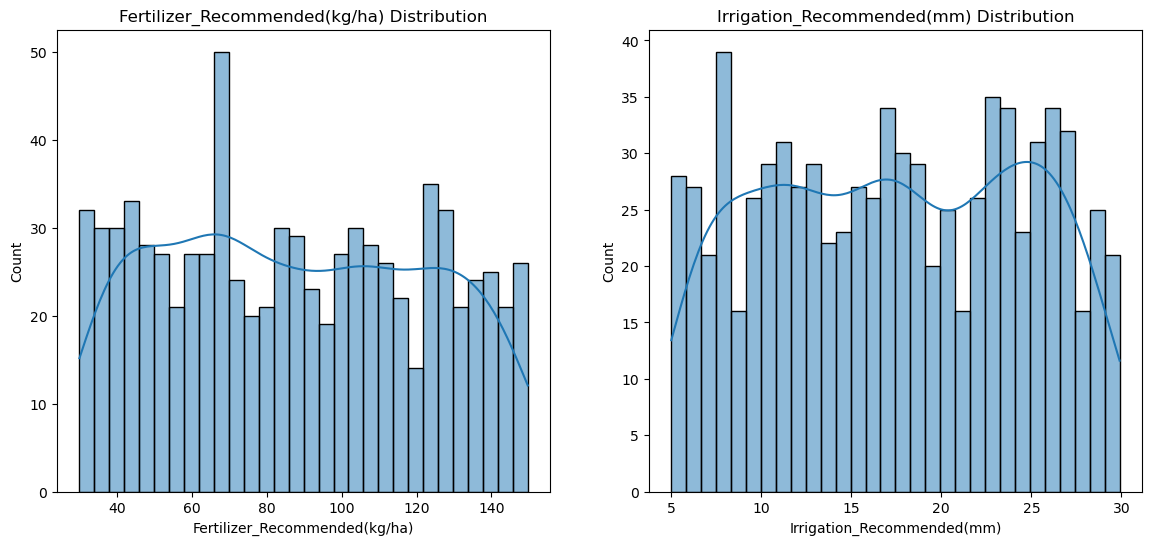

In [27]:
#histograms for the numeric values 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Fertilizer_Recommended(kg/ha) Distribution")
sns.histplot(df['Fertilizer_Recommended(kg/ha)'],bins=30,kde=True)

plt.subplot(1,2,2)
plt.title("Irrigation_Recommended(mm) Distribution")
sns.histplot(df['Irrigation_Recommended(mm)'],bins=30,kde=True)
plt.show()

In [28]:
# examine the relationships between soil and environmental variables. 
# From your analysis, identify which variables most influence fertilizer recommendations, 
# determine the crop type with the highest average soil moisture, and 
# suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C. 


In [29]:
#examine
#since all correlation values are between −0.03 and +0.08, 
#this indicates no strong linear relationships among these variables.
#this shows that these environmental variables vary independently


In [30]:
# Variables Most Influencing Fertilizer Recommendations
# based on the heat map
# Soil pH: +0.08
# Humidity (%): +0.02

# Soil pH shows the highest positive correlation with Fertilizer_Recommended(kg/ha). No variable has a strong influence,
# so fertilizer recommendations should recommend on external agronomic factors like soil type

In [31]:
#determine the crop type with the highest average soil moisture,

max_soil_moisture=df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
crop=max_soil_moisture.idxmax()
max_value=max_soil_moisture.max()
print(f'crop  with max average value: \n{crop} ={max_value}')

crop  with max average value: 
Wheat =47.356448863636366


In [32]:
# appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.
average_temp=df.groupby('Crop_Type')['Temperature(C)'].mean()
crops=average_temp
print(crops)


Crop_Type
Beans       26.855921
Lettuce     26.162252
Maize       27.010323
Tomatoes    26.170833
Wheat       26.171591
Name: Temperature(C), dtype: float64


In [33]:
#above 30°C
crops_above_30=average_temp[average_temp>30]
print(crops_above_30)

Series([], Name: Temperature(C), dtype: float64)


In [35]:
# suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C. 
# there is no crop whose average temperature is above 30°C,
# i strongly encourage continuous irrigation to maintain the tempeartures or
# reduce the existing ones to enhance crop production
df['Temperature(C)'].mean()

26.461471321695758

<Axes: title={'center': 'Average temperature vs crops'}, ylabel='Temperature(C)'>

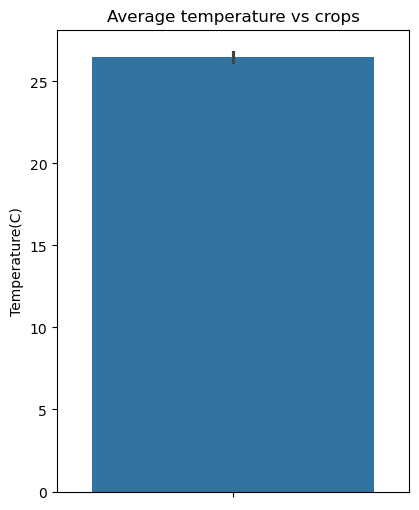

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Average temperature vs crops")
sns.barplot(y=average_temp,x=crops_above_30)

In [ ]:
# export your clean dataset as cleaned_precision_agriculture_data.csv

df.to_csv('cleaned_precision_agriculture_data.csv')

In [ ]:
#insights from the analysis
#i would recommend continuous irrigation to maintain the temperatures or reduce the existing ones to enhance crop production
#as the average temperature is above 30°C for all crops
#the crop type with the highest average soil moisture is maize
#the variables most influencing fertilizer recommendations are Soil pH and Humidity (%)
#the correlation heatmap shows no strong linear relationships among the variables
#the histograms show the distribution of the numeric values
#the data is now clean and ready for further analysis or modeling

In [ ]:
#recommendations for future data collection
#1. Ensure consistent data entry formats, especially for dates and numeric values.
#2. Regularly update the dataset to include new crop types and environmental conditions.
#3. Include additional variables that may influence crop yield, such as soil type, rainfall, and pest management practices.
#4. Implement a system for tracking changes in agricultural practices and their impact on crop yield.
#5. Consider collecting data on crop yield to correlate with environmental and soil conditions.